# Genetic differentiation of the module in percent

Made by: Cynthia Soto <br>
Date: June 18th, 2021 <br>
Last md: May 19th, 2021 <br>

**Assumptions:** <br>
1. Data are a tvs files with the ID of the genes. Each file is a genetic module obtained with the WGCNA tool.
    1. Exist 2 folders, one for the genetic modules for the control & another for the genetic modules for the infected plants.
    2. Modules from infected plants will be compared against modules from healthy plants with logical comparisons. Only modules >70% differentiated from the controls will be kept. 
<br>

**Code goal:** <br>
1. The key field for comparisons is the gene ID.
2. Multiple arithmetic comparisons are made.
3. The logical difference is set to a percentage representation (arithmetic: mod-inf-gen-dif*100 / mod-inf-gen-size) <br>
4. Only those modules with a percentage difference >70% are kept.
5. More weight is given to modules <=300 genes to create the visualizations. <br>
6. Plot <br>

In [1]:
import os
import matplotlib.pyplot as plt
# Set some initial configuration 
import pandas as pd
pd.set_option("display.precision", 2)
# ^^^ pyforest auto-imports - don't write above this line
#from pyforest import *  # import the 40 most popular libraries to your notebook
# to see the available libraries 
# lazy_imports()

In [2]:
os.getcwd()

'/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/notebooks'

In [3]:
# Set the base directory
try:
    # Change the current working Directory      
    os.chdir("../results-data/wgcna")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")        

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna


### Folders with modules identify in wgcna

In [4]:
# Check the available folders with genetic modules
import glob
## check a bit of the files to be processed ... are they ok?
s_path = str(os.getcwd()+'/Athal*') 
all_files = glob.glob(s_path)
for file in all_files:
    print(file)

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_comparition_profile78.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_comparition_profile75.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_comparition_profile77.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_comparition_profile76.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_comparition_profile70.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_comparition_profile90.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_selected_clusters.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_selected_clusters (copia).csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-anal

### Function declaration

In [5]:
def load_ctl_mod_to_compare(s_mod_name):
    # Create a set of the module in control required
    # IN:     @ s_mod_name: name of the file containing the gene list
    # OUT:    @ set_gene_ctrl: a set containing the unique genes to be compared 
    mod = '../Athal_healthy_mods_merged_MatrixD/'+ s_mod_name
    df1 = pd.read_csv(mod, header=None)    ## nrows=100, usecols=[0,1]
    gene_inf_lst = df1[0].tolist()
    set_gene_ctrl = set(gene_inf_lst)
    #print(set_gene_ctrl)
    return set_gene_ctrl

In [6]:
def make_autopct(values):
# percentual and float values
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

In [7]:
def make_autopct2(values):
# percentual
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct

In [8]:
def make_pie_donut_chart(q, lbs, title):
    #fig1, ax1 = plt.subplots(figsize=(10,8), dpi = 300)
    fig1, ax1 = plt.subplots(figsize=(8,6), dpi = 300)
    ax1.pie(q, labels=lbs,autopct=make_autopct2(q), 
             textprops={'fontsize': 19}, startangle=60)              
    centre_circle = plt.Circle((0,0),0.80,fc='white')
    ax1.text(0, -.1, title, ha='center', fontsize=24)

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()
    return

In [9]:
def make_pie_donut_chart2(q, lbs, title):
    fig1, ax1 = plt.subplots(figsize=(10,8), dpi = 300)
    ax1.pie(q, labels=lbs,autopct=make_autopct(q), 
             textprops={'fontsize': 16}, startangle=60)              
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.text(0, -.1, title, ha='center', fontsize=24)

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()
    return

### Modules comparitions
#### Create the list of modules in the infected dataset to be compared 
Option 1: we can pick up to make logic comparition using all the clusters (All MGI agains MGC preselected) <br>
Option 2: we can pick up to make logic comparition using pre-clusters (Preselected MGI agains MGC preselected) <br>

In [10]:
os.chdir("Athal_infected_mods_merged_MatrixE")

In [11]:
##########################################
#   This chunk is for option 1 
##########################################

# dirListing_inf = os.listdir(str(os.getcwd()))
# print("Number of modules in infected dataset:" + str(len(dirListing_inf)))
# path_files = os.getcwd()
# print(path_files)
# dirListing_inf[0:5]

In [12]:
##########################################
#   This chunk is for option 2 
##########################################

df_MGI = pd.read_csv("../Athal_infected_selected_clusters.csv", header=0, usecols=[2])
df_MGI.head(5)

,mergedColors
0,brown2
1,chocolate
2,chocolate2
3,lavender
4,mediumpurple1


In [13]:
#Create the lst of the modules in recursive mod
df_MGI["mergedColors"] = 'mod_merged_' + df_MGI['mergedColors'] + '.txt'
df_MGI.head(5)
dirListing_inf = df_MGI['mergedColors'].to_list()
dirListing_inf[0:5]

['mod_merged_brown2.txt',
 'mod_merged_chocolate.txt',
 'mod_merged_chocolate2.txt',
 'mod_merged_lavender.txt',
 'mod_merged_mediumpurple1.txt']

In [14]:
# preselected mods
len(dirListing_inf)

13

## Make logic commparitions between treatment & control modules (wgcna modules)

1. Create a list with the module's names (control) to be parsed in recursive mode <br>
**Option 1**: parse a directory to create the list of genetic control modules (MGC) <br>
**Option 2**: parse a file with preselected MGC to create the list of genetic control modules (MGC) <br>

2. Build a dictionary to save the result's comparitions for further analysis <br>
Parse infected modules across control modules (w/high correlation) saved in the variable 'lst_mods_ctrl' (step 1)

In [15]:
# STEP 1
# Step 1 / Option 1: This chunk parse a directory to create a list for all control (healthy) modules

# os.chdir("../Athal_healthy_mods_merged_MatrixD")
# print("Directory changed:", os.getcwd() )
# # First check the number of modules to compare 
# dirListing_ctl = os.listdir(str(os.getcwd()))
# i_mods_to_parse = len(dirListing_ctl)
# print("Number of modules in ctrl:" + str(i_mods_to_parse))

# # Second check the name of the modules
# s_path = str(os.getcwd()+'/*') 
# path_files_ctrl = glob.glob(s_path)
# #print("Path file control:", path_files_ctrl)

# #Create the lst of the modules in recursive mode
# lst_mods_ctrl=[]
# for file in path_files_ctrl:
#     #print(os.path.basename(file))
#     lst_mods_ctrl.append(os.path.basename(file))
# print(lst_mods_ctrl[0:5])
# i_mods_to_parse = len(lst_mods_ctrl)

In [16]:
# STEP 1
# Step 1 / Option 2: This chunk parse a directory to create a list for preselected control modules (healthy)
# This option takes into account that infected genetic modules be compared just with relevant healthy modules
# read csv file
df=pd.read_csv("../Athal_healthy_selected_clusters.csv", sep=',', header=0, usecols=[1])
df
#Create the lst of the modules in recursive mod
df["mergedColors"] = 'mod_merged_' + df['mergedColors'] + '.txt'
lst_mods_ctrl = df["mergedColors"].to_list()
print(lst_mods_ctrl[0:4])
i_mods_to_parse = len(lst_mods_ctrl)
print(i_mods_to_parse)
#os.chdir("../Athal_healthy_mods_merged_MatrixD")

['mod_merged_coral3.txt', 'mod_merged_mistyrose3.txt', 'mod_merged_tan1.txt', 'mod_merged_orange1.txt']
21


In [17]:
# STEP 2
# Build a dictionary to save the result's comparitions for further analysis 
# print(os.getcwd())

In [18]:
#### 
my_dict={}
x = 1
y = 1 # for assing unique keys to the dict

# os.chdir("../Athal_infected_mods_merged_MatrixE")
# print(os.getcwd())
for file in dirListing_inf:    # files is each infected module
    #print(file)
    # Prepare first set to be compared
    df1 = pd.read_csv(file, header=None)    ## nrows=100, usecols=[0,1]
    gene_list = df1[0].tolist()
    # Get a unique set of genes from the specific infected module
    uniqueGenes_inf = set(gene_list)
    #print(uniqueGenes_inf)
    mod_inf_name = str(os.path.basename(file))
    mod_inf_name_lng = len(uniqueGenes_inf)
    print("Infected Mod compare " + str(x) + ": " + mod_inf_name + ' have ' + str(mod_inf_name_lng) + ' unique genes')
   
    ##################################
    # Compare the specific infected mod against all the healthy preselected mods to the percentual diference
    # Go to the folder <<control>> because is the one to be parsed 
    os.chdir("../Athal_healthy_mods_merged_MatrixD")
    for i in range (i_mods_to_parse):  #i_mods_to_parse
        mod_name = lst_mods_ctrl[i]
        #print("Ctrl mod: ", mod_name)
        #call the function that load the healthy mod to be compared
        uniqueGenes_ctr = load_ctl_mod_to_compare(mod_name)
        dif_AB = len(uniqueGenes_inf - uniqueGenes_ctr) 
        # Make the module logic comparition
        if mod_inf_name_lng == dif_AB:
            PercDif_AB = 100
        else :
            PercDif_AB = (100 * dif_AB) / mod_inf_name_lng
        # mod_inf_name, mod_inf_name_lng, 
        mod_ctl_name_lng = len(uniqueGenes_ctr)
        #print(mod_name, '\t', mod_ctl_name_lng,'\t',dif_AB,'\t', PercDif_AB)
        # Insert the result of the comparition into a dicitonary for further analysis
        #print(y)
        my_dict[y] = {}
        my_dict[y]['Mod_Inf'] = mod_inf_name.rsplit( ".", 1 )[ 0 ] 
        my_dict[y]['Mod_Lng_Inf'] = mod_inf_name_lng
        my_dict[y]['Mod_Ctl'] = mod_name.rsplit(".",1)[0]
        my_dict[y]['Mod_Lng_Ctl'] = mod_ctl_name_lng
        my_dict[y]['Genes_diff'] = dif_AB
        my_dict[y]['Perc_diff']= PercDif_AB
        y = y+1
    ################################## 
    
    # Now change the directory bacause of another module of infected is going to be read
    os.chdir("../Athal_infected_mods_merged_MatrixE")
    x = x + 1    # to escape in the first infected mod
    #if x > 3: break
#print(my_dict)              
print("done")

Infected Mod compare 1: mod_merged_brown2.txt have 261 unique genes
Infected Mod compare 2: mod_merged_chocolate.txt have 818 unique genes
Infected Mod compare 3: mod_merged_chocolate2.txt have 573 unique genes
Infected Mod compare 4: mod_merged_lavender.txt have 99 unique genes
Infected Mod compare 5: mod_merged_mediumpurple1.txt have 189 unique genes
Infected Mod compare 6: mod_merged_darkmagenta.txt have 133 unique genes
Infected Mod compare 7: mod_merged_mistyrose3.txt have 386 unique genes
Infected Mod compare 8: mod_merged_firebrick2.txt have 304 unique genes
Infected Mod compare 9: mod_merged_green.txt have 236 unique genes
Infected Mod compare 10: mod_merged_tan3.txt have 189 unique genes
Infected Mod compare 11: mod_merged_indianred.txt have 160 unique genes
Infected Mod compare 12: mod_merged_lightsteelblue.txt have 540 unique genes
Infected Mod compare 13: mod_merged_coral4.txt have 98 unique genes
done


In [19]:
my_dict[1]
#my_dict[1]['Perc_diff']

{'Mod_Inf': 'mod_merged_brown2',
 'Mod_Lng_Inf': 261,
 'Mod_Ctl': 'mod_merged_coral3',
 'Mod_Lng_Ctl': 2024,
 'Genes_diff': 221,
 'Perc_diff': 84.67432950191571}

In [20]:
# Creates DataFrame with the dict 
# Lists of dictionaries and row index.
df = pd.DataFrame(my_dict, index =['Mod_Inf','Mod_Lng_Inf','Mod_Ctl','Mod_Lng_Ctl','Genes_diff','Perc_diff'])
# Print the data
df

,1,2,3,4,5,6,7,8,9,10,...,264,265,266,267,268,269,270,271,272,273
Mod_Inf,mod_merged_brown2,mod_merged_brown2,mod_merged_brown2,mod_merged_brown2,mod_merged_brown2,mod_merged_brown2,mod_merged_brown2,mod_merged_brown2,mod_merged_brown2,mod_merged_brown2,...,mod_merged_coral4,mod_merged_coral4,mod_merged_coral4,mod_merged_coral4,mod_merged_coral4,mod_merged_coral4,mod_merged_coral4,mod_merged_coral4,mod_merged_coral4,mod_merged_coral4
Mod_Lng_Inf,261,261,261,261,261,261,261,261,261,261,...,98,98,98,98,98,98,98,98,98,98
Mod_Ctl,mod_merged_coral3,mod_merged_mistyrose3,mod_merged_tan1,mod_merged_orange1,mod_merged_deepskyblue,mod_merged_darkolivegreen4,mod_merged_thistle1,mod_merged_magenta2,mod_merged_lightblue1,mod_merged_darkolivegreen2,...,mod_merged_antiquewhite,mod_merged_navajowhite3,mod_merged_mediumpurple1,mod_merged_coral1,mod_merged_mediumpurple3,mod_merged_navajowhite1,mod_merged_blue3,mod_merged_brown3,mod_merged_antiquewhite3,mod_merged_firebrick2
Mod_Lng_Ctl,2024,33,33,95,834,1792,273,204,195,1175,...,577,492,273,141,109,87,79,39,764,210
Genes_diff,221,261,260,259,252,244,254,258,246,253,...,94,97,98,98,98,98,97,98,97,98
Perc_diff,84.67,100,99.62,99.23,96.55,93.49,97.32,98.85,94.25,96.93,...,95.92,98.98,100,100,100,100,98.98,100,98.98,100


In [21]:
# number of comparitions done
len(df.columns)

273

In [22]:
# transpose the df to re-organize data
df_comp = df.T
df_comp.head(3)

,Mod_Inf,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
1,mod_merged_brown2,261,mod_merged_coral3,2024,221,84.67
2,mod_merged_brown2,261,mod_merged_mistyrose3,33,261,100
3,mod_merged_brown2,261,mod_merged_tan1,33,260,99.62


In [23]:
# # Save the file with the comparition results
# df_comp.to_csv("../modules_merged_comparition.csv", sep=",", header=True)

### Make profiles for each infected module based on the porcentualm difference against the MGC
We set threshold difference at 80%, 90%, 95% and 100%
Base on the number of infected mods differenced from the healthy mods in the % criteria of gene identity

In [24]:
df_comp.head(3)

,Mod_Inf,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
1,mod_merged_brown2,261,mod_merged_coral3,2024,221,84.67
2,mod_merged_brown2,261,mod_merged_mistyrose3,33,261,100
3,mod_merged_brown2,261,mod_merged_tan1,33,260,99.62


In [25]:
# # show a treemap plot over the Gene difference in the comparitions
# import squarify 

# df_comp.sort_values('Genes_diff', ascending=False, inplace=True)
# print(df_comp.head(5))
# fig, ax = plt.subplots(1, figsize = (12,12))
# squarify.plot(sizes=df_comp['Genes_diff'], 
#               label=df_comp['Mod_Inf'][:5], 
#               alpha=.8 )
# plt.axis('off')
# plt.show()

### Set the percentual differenciation threshold

**Get a dataset filtered by gene difference (% identity) & groupby mod name (infected) to cut off redundancy and count the number of ocurrences**

In [26]:
# selecting rows based on condition 
perc_dif_set = 77
rslt_df = df_comp[(df_comp['Perc_diff'] >= perc_dif_set)] 
print(rslt_df.head(10))
print(len(rslt_df))
# Get the number of control modules differenced from the infected dataset
df1_count = rslt_df.groupby(['Mod_Inf']).count()
print(len(df1_count))
df1_count.head(10)

              Mod_Inf Mod_Lng_Inf                     Mod_Ctl Mod_Lng_Ctl  \
1   mod_merged_brown2         261           mod_merged_coral3        2024   
2   mod_merged_brown2         261       mod_merged_mistyrose3          33   
3   mod_merged_brown2         261             mod_merged_tan1          33   
4   mod_merged_brown2         261          mod_merged_orange1          95   
5   mod_merged_brown2         261      mod_merged_deepskyblue         834   
6   mod_merged_brown2         261  mod_merged_darkolivegreen4        1792   
7   mod_merged_brown2         261         mod_merged_thistle1         273   
8   mod_merged_brown2         261         mod_merged_magenta2         204   
9   mod_merged_brown2         261       mod_merged_lightblue1         195   
10  mod_merged_brown2         261  mod_merged_darkolivegreen2        1175   

   Genes_diff Perc_diff  
1         221     84.67  
2         261       100  
3         260     99.62  
4         259     99.23  
5         252     96.5

,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
Mod_Inf,,,,,
mod_merged_brown2,21,21,21,21,21
mod_merged_chocolate,21,21,21,21,21
mod_merged_chocolate2,21,21,21,21,21
mod_merged_coral4,21,21,21,21,21
mod_merged_darkmagenta,21,21,21,21,21
mod_merged_firebrick2,21,21,21,21,21
mod_merged_green,21,21,21,21,21
mod_merged_indianred,21,21,21,21,21
mod_merged_lavender,20,20,20,20,20


In [27]:
# The count-module infected dataset is sorted by counts to build a nice plot further
df1_count.reset_index(inplace=True)
df1_count.sort_values(by='Mod_Lng_Inf', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
df1_count = df1_count[['Mod_Inf','Mod_Lng_Inf']]
df1_count = df1_count.rename(columns = {'Mod_Lng_Inf':'Mods_count'})
# df1_count.to_csv("../Athal_infected_mods_comparition_profile"+ str(perc_dif_set)  +".csv", index=False, header=True)  #wgcna folder
df1_count.head(5)

,Mod_Inf,Mods_count
0,mod_merged_brown2,21
1,mod_merged_chocolate,21
2,mod_merged_chocolate2,21
3,mod_merged_coral4,21
4,mod_merged_darkmagenta,21


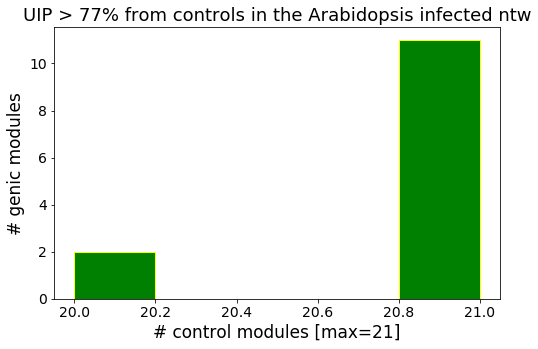

In [28]:
# build a histogram to show the number of ocurrences (module-count by infected module)
ax = df1_count.hist(column='Mods_count', grid=False, color='green', edgecolor="yellow", bins='auto', figsize=(8,5)) # bins=3
plt.title('UIP > ' + str(perc_dif_set) + '% from controls in the Arabidopsis infected ntw',fontsize=18);
plt.xlabel('# control modules [max=21]',fontsize=17);
plt.ylabel('# genic modules',fontsize=17);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

In [29]:
# from the rslt_df (filtered at x%) df get the unique mod-names (infected) --this have other fields need it for plotting
df_unique_inf = rslt_df.drop_duplicates(subset=["Mod_Inf"])
print(len(df_unique_inf))
print(df_unique_inf.head(3))

13
                  Mod_Inf Mod_Lng_Inf            Mod_Ctl Mod_Lng_Ctl  \
1       mod_merged_brown2         261  mod_merged_coral3        2024   
22   mod_merged_chocolate         818  mod_merged_coral3        2024   
43  mod_merged_chocolate2         573  mod_merged_coral3        2024   

   Genes_diff Perc_diff  
1         221     84.67  
22        758     92.67  
43        495     86.39  


In [30]:
# get the modules (infected) with gene-member-density less than 300 genes
df_preselected_mods = df_unique_inf[df_unique_inf['Mod_Lng_Inf']<=1000]
mods_count = len(df_preselected_mods)
print(mods_count)
# sort by gene-size to plot
df_preselected_mods = df_preselected_mods.sort_values(by=['Mod_Lng_Inf'], ascending=False)
df_preselected_mods.head(15)

13


,Mod_Inf,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
22,mod_merged_chocolate,818,mod_merged_coral3,2024,758,92.67
43,mod_merged_chocolate2,573,mod_merged_coral3,2024,495,86.39
233,mod_merged_lightsteelblue,540,mod_merged_mistyrose3,33,540,100
127,mod_merged_mistyrose3,386,mod_merged_coral3,2024,369,95.6
148,mod_merged_firebrick2,304,mod_merged_coral3,2024,235,77.3
1,mod_merged_brown2,261,mod_merged_coral3,2024,221,84.67
169,mod_merged_green,236,mod_merged_coral3,2024,222,94.07
85,mod_merged_mediumpurple1,189,mod_merged_coral3,2024,164,86.77
190,mod_merged_tan3,189,mod_merged_coral3,2024,163,86.24
211,mod_merged_indianred,160,mod_merged_coral3,2024,152,95.0


### Plot a pie chart to show putative gene-mods (infected) that passed 2 criterias:
1. Gene-identity surpass x% <br>
2. Gene-size mod is less than x <br>

**Result**: number of 'ocurrences' different against 'mods-control' is a clue to select mods to track in the biology context

In [31]:
# get series for plotting a pie chart
labels = df_preselected_mods["Mod_Inf"].to_list()
labels = ([s.replace('mod_merged_', '') for s in labels])
#labels
quantity = df_preselected_mods["Mod_Lng_Inf"].to_list()
quantity[0:4]

[818, 573, 540, 386]

In [32]:
labels2 = []
labels2.append('chocolate Bc24+')
labels2.append('chocolate2 Ch22+')
labels2.append( 'lightsteelblue Ch22+')
labels2.append( 'mistyrose3 Bc24+')
labels2.append( 'firebrick2 Bc24+')
labels2.append( 'brown2 Ch22+')
labels2.append( 'green Bc-/Ch22+')
labels2.append( 'mediumpurple1 Ch22+')
labels2.append( 'tan3 Ch22+')
labels2.append( 'indianred Bc-/Ch22+')
labels2.append( 'darkmagenta ++')
labels2.append( 'lavender Bc24+')
labels2.append( 'coral4 Bc-/Ch22+')

In [33]:
# fig1, ax1 = plt.subplots(figsize=(10,8))

# # Labels with percentual and float values
# ax1.pie(quantity, labels=labels,autopct=make_autopct2(quantity), 
#          textprops={'fontsize': 14}, startangle=50)              
# centre_circle = plt.Circle((0,0),0.70,fc='white')
# ax1.text(0, -.2, '20 Athal infected \npreselected mods \n\ncorr ~0.80 \ngene-diff-ID>80 \nmod-size<=300 genes', 
#          ha='center', fontsize=17)

# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')  
# plt.tight_layout()
# #plt.title("Preselected modules in Arabidopsis infected (corr ~0.80)\ngene-diff-ID>80% & mod-size<=300 genes", fontsize=20)
# plt.show()

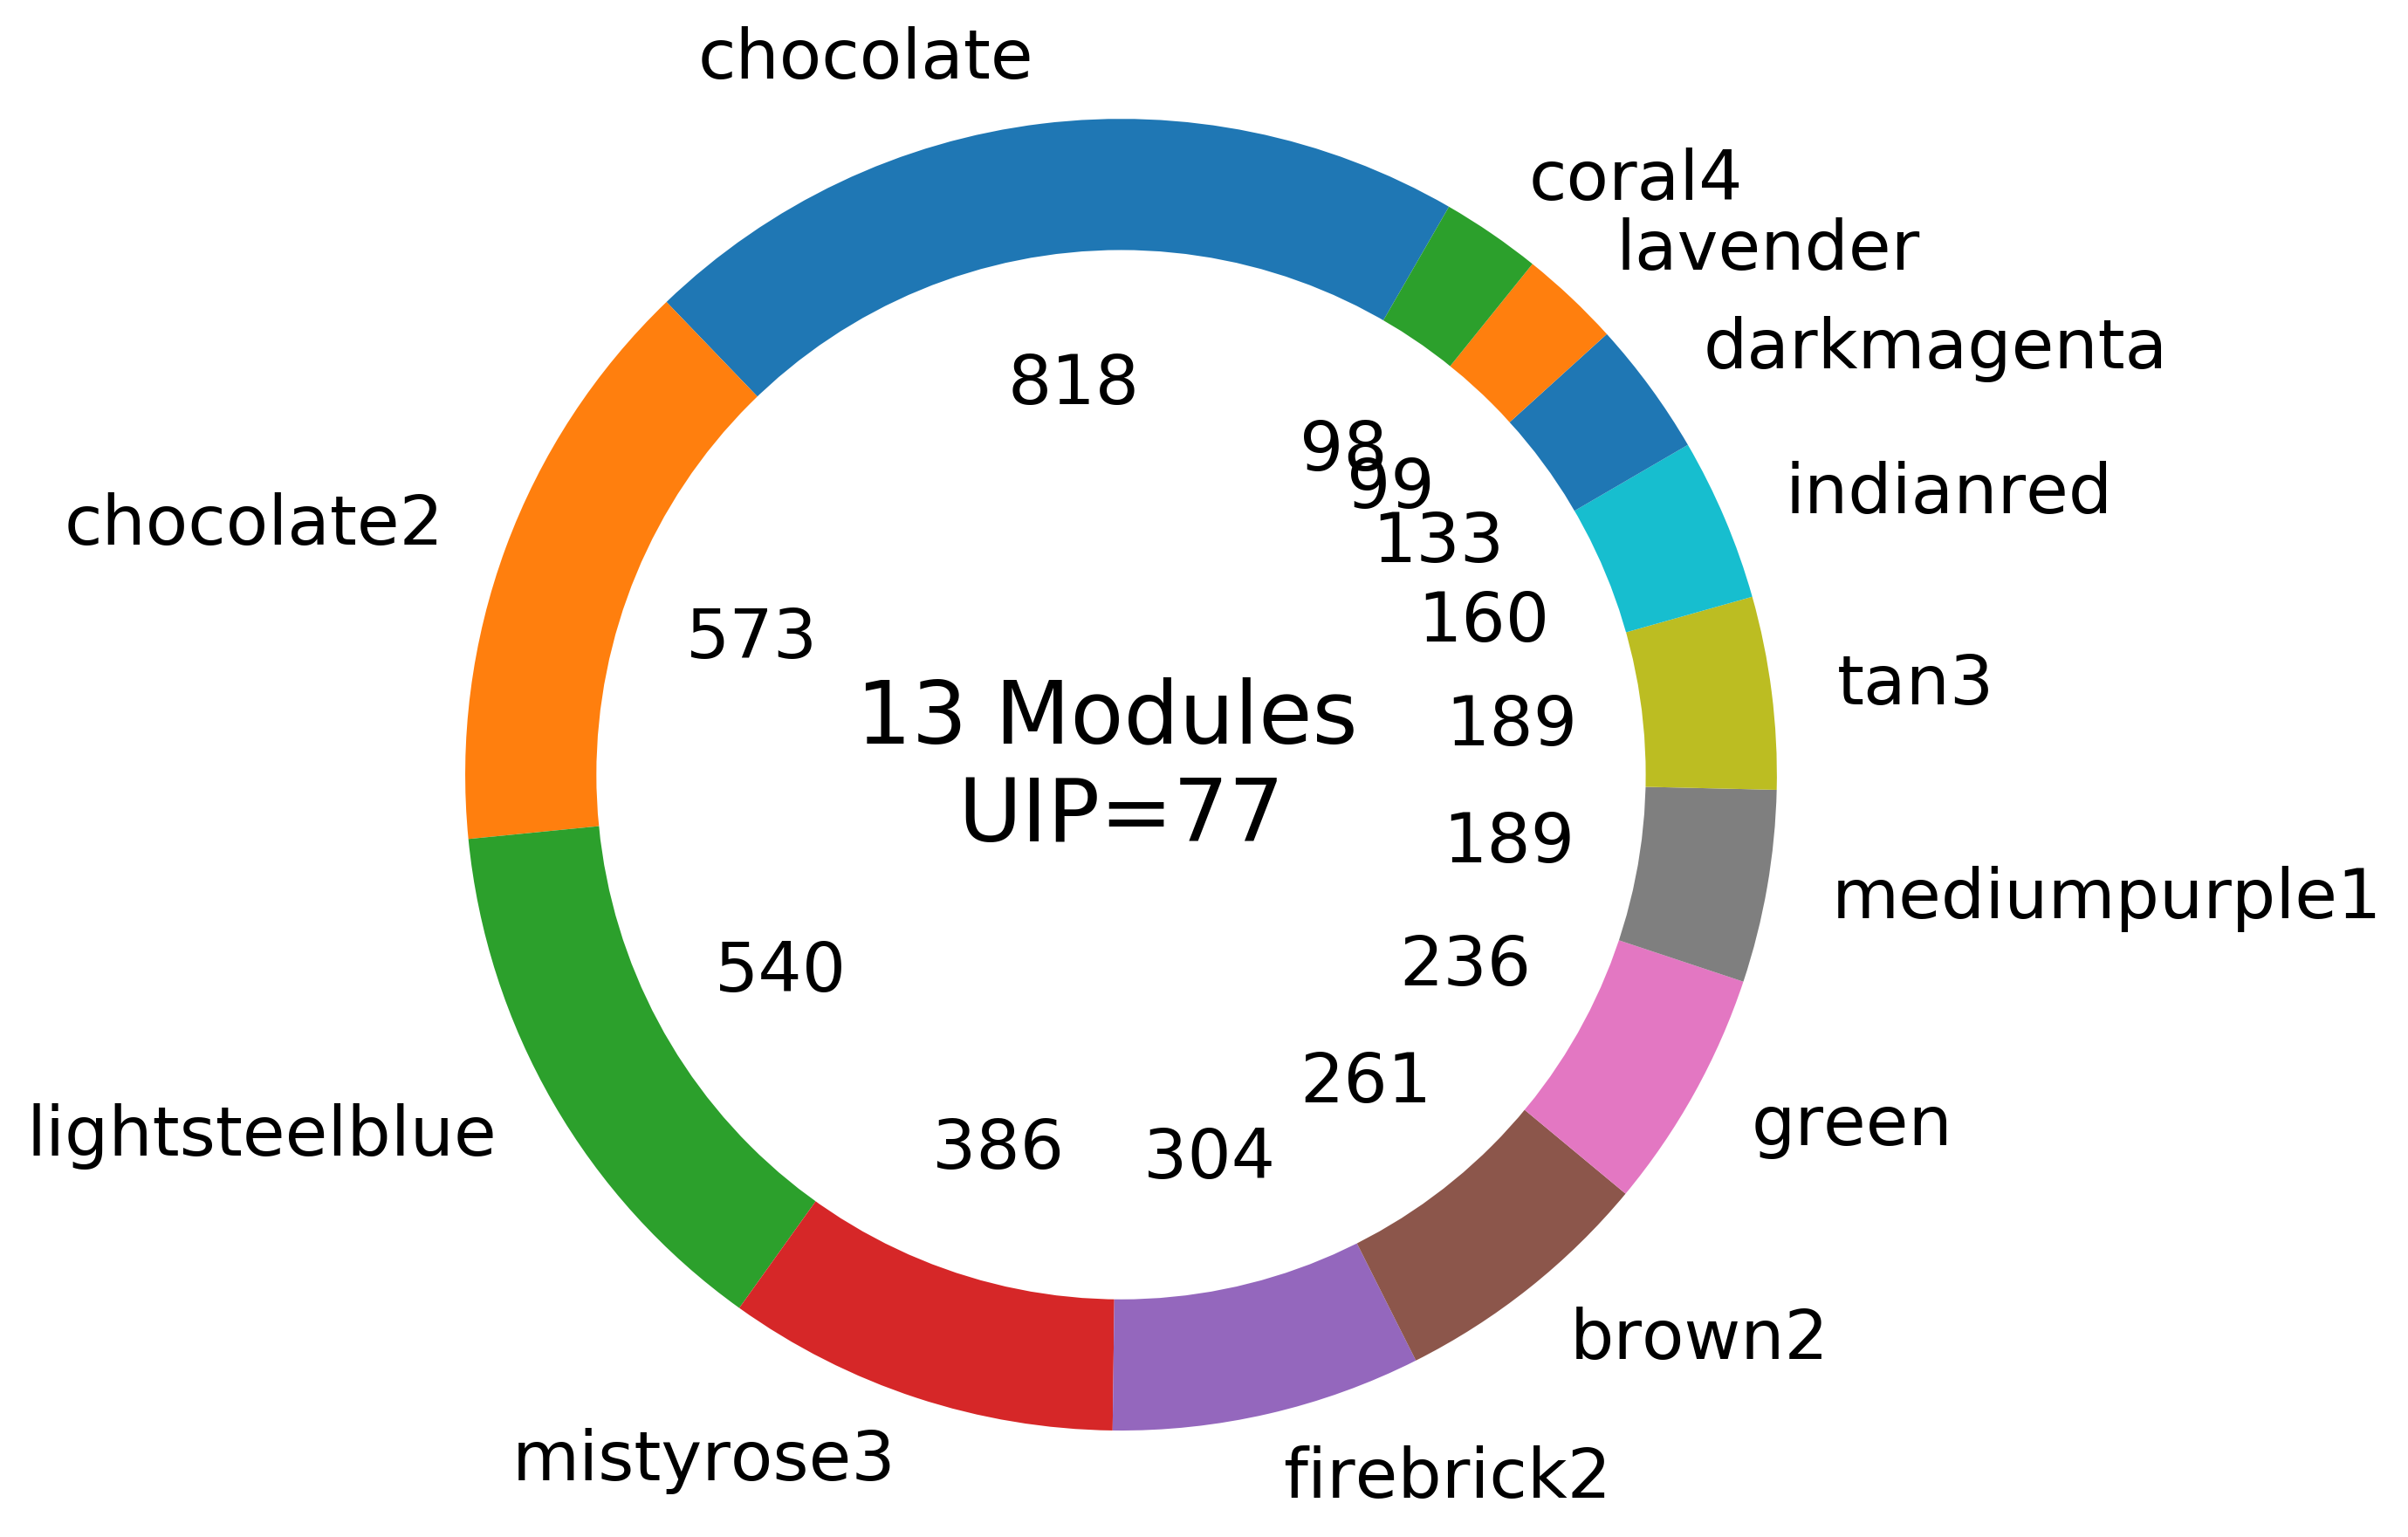

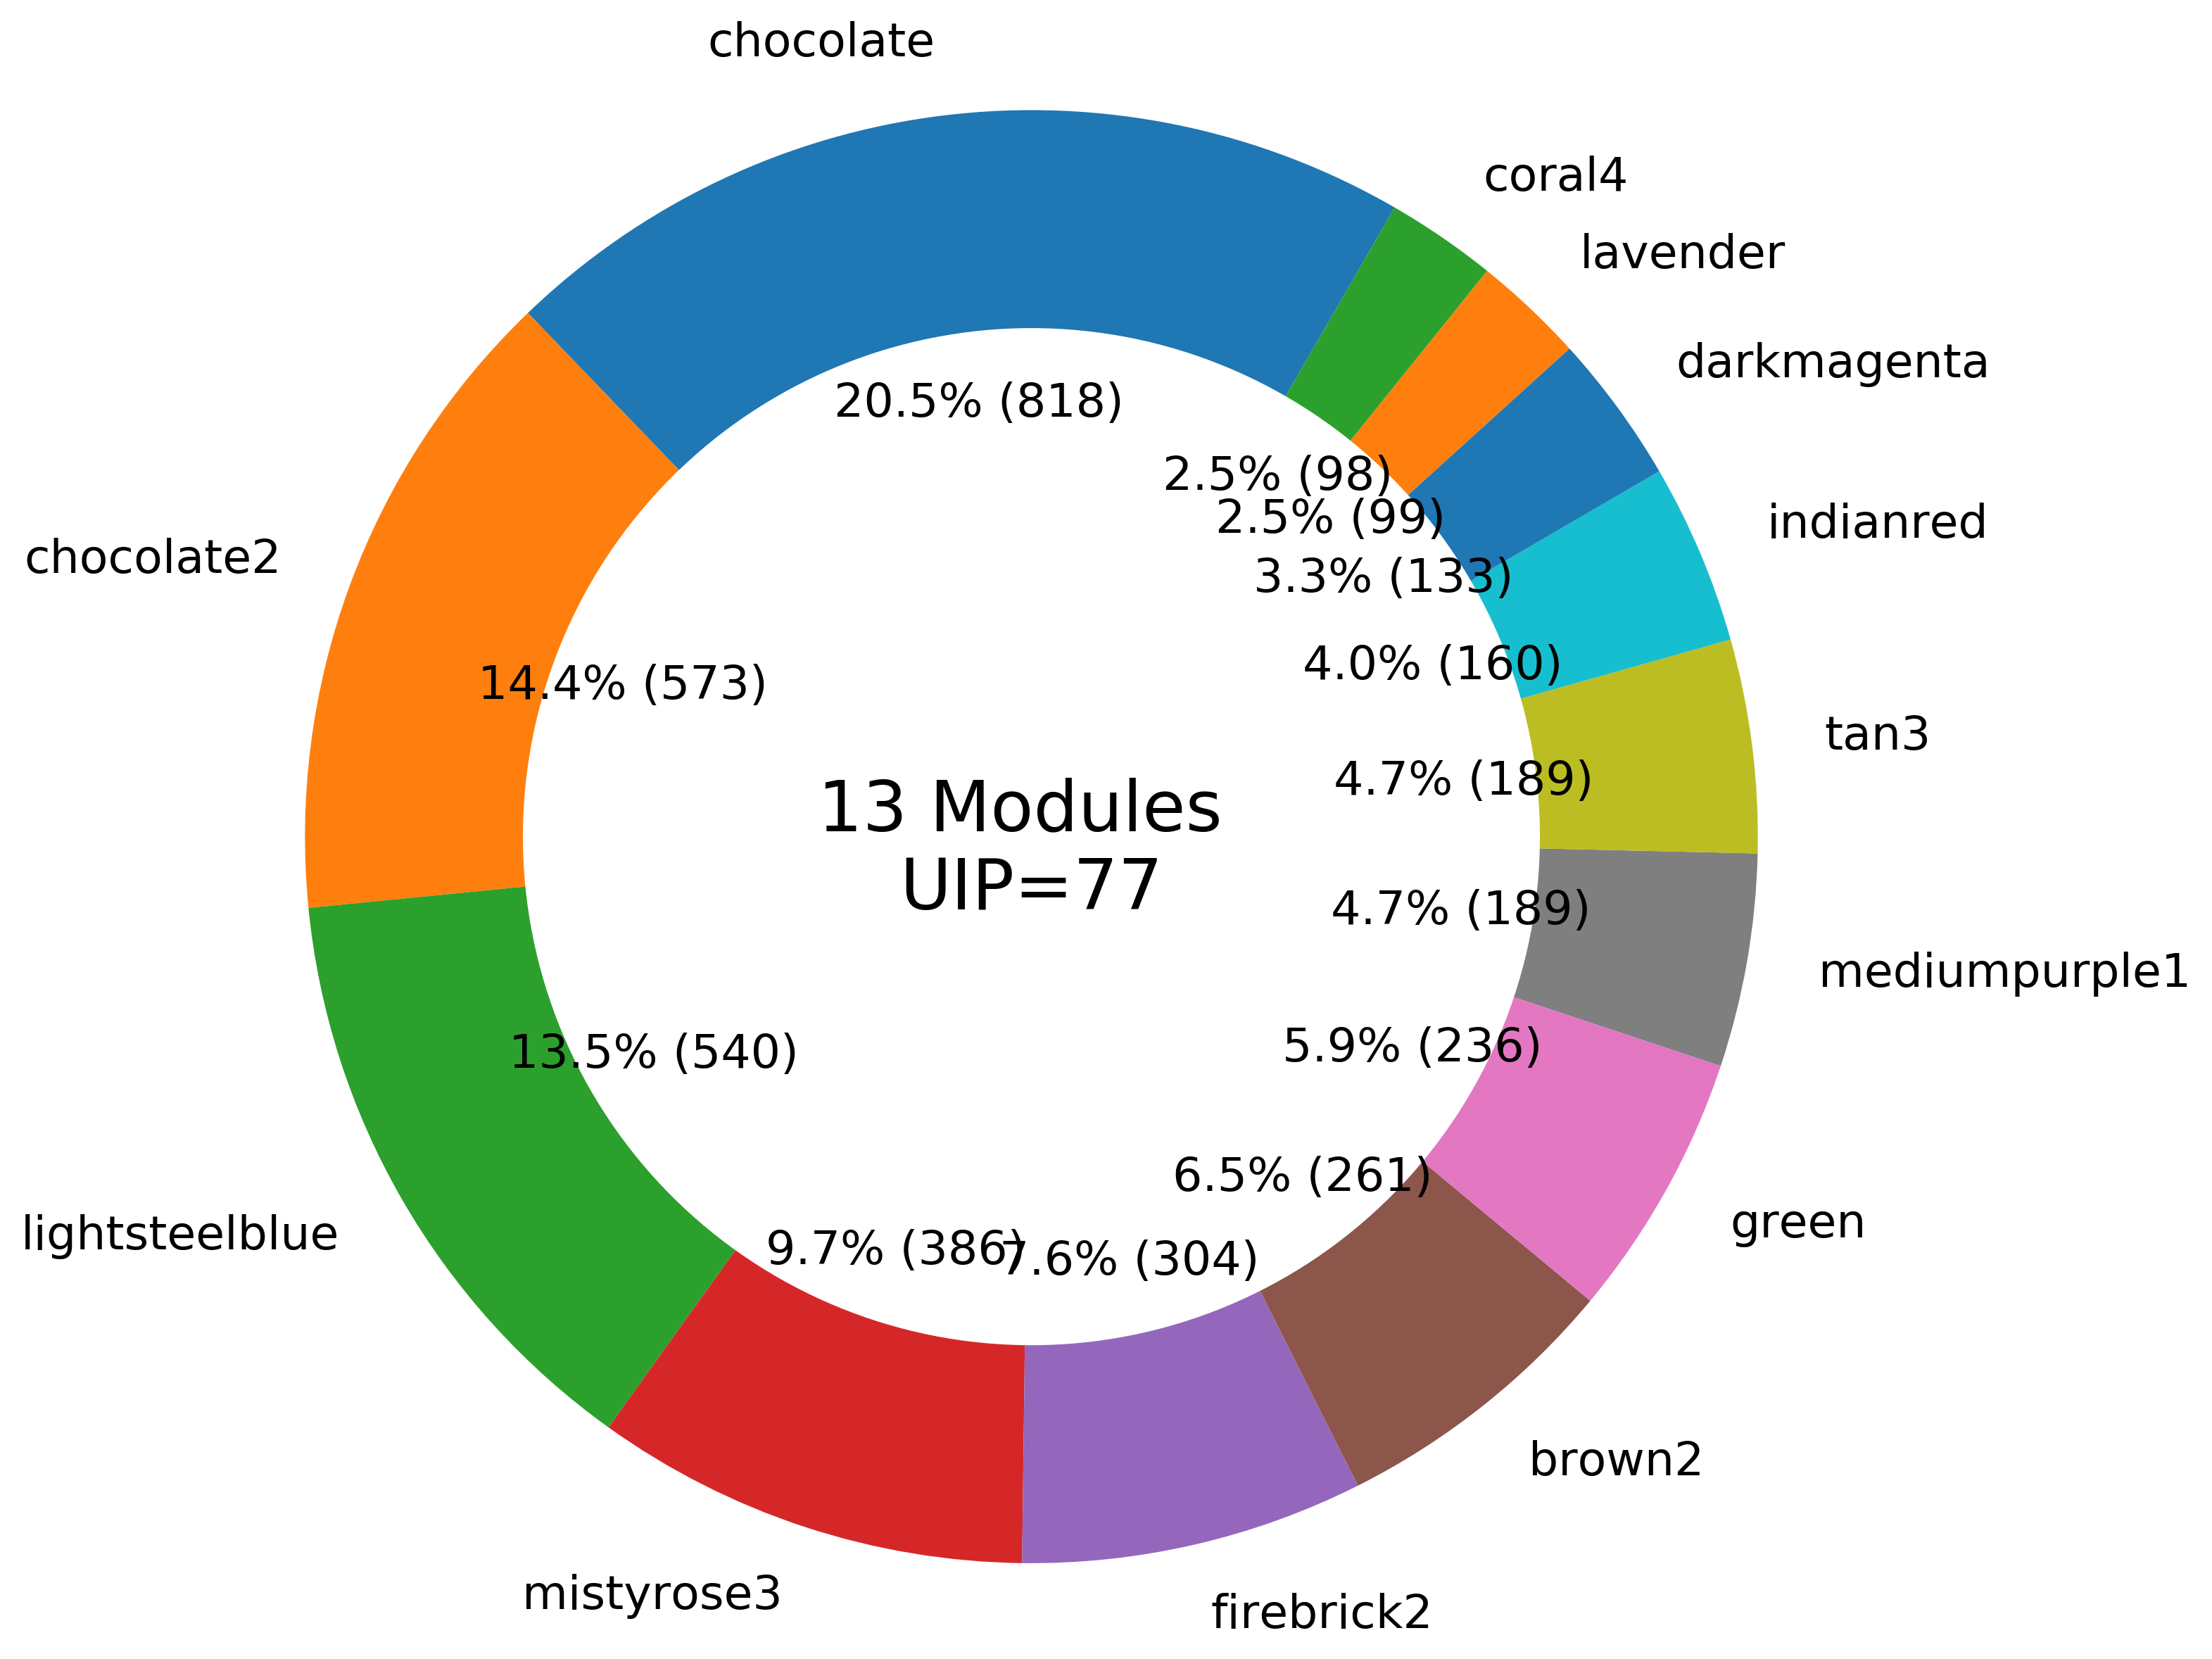

In [34]:
text = str(mods_count) + ' Modules \nUIP=' + str(perc_dif_set) #+ '%\nTHR1+THR2+THR3'
make_pie_donut_chart(quantity, labels, text)  
make_pie_donut_chart2(quantity, labels, text)  
#make_pie_donut_chart(quantity, labels2, text)   

### Plot the same dataset result now by mods ocurrence difference 
Merge by 'Mod_Inf' the count-ocurrences df with the preselected df

In [35]:
print(df1_count.head(3))
df_preselected_mods.head(30)

                 Mod_Inf  Mods_count
0      mod_merged_brown2          21
1   mod_merged_chocolate          21
2  mod_merged_chocolate2          21


,Mod_Inf,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
22,mod_merged_chocolate,818,mod_merged_coral3,2024,758,92.67
43,mod_merged_chocolate2,573,mod_merged_coral3,2024,495,86.39
233,mod_merged_lightsteelblue,540,mod_merged_mistyrose3,33,540,100
127,mod_merged_mistyrose3,386,mod_merged_coral3,2024,369,95.6
148,mod_merged_firebrick2,304,mod_merged_coral3,2024,235,77.3
1,mod_merged_brown2,261,mod_merged_coral3,2024,221,84.67
169,mod_merged_green,236,mod_merged_coral3,2024,222,94.07
85,mod_merged_mediumpurple1,189,mod_merged_coral3,2024,164,86.77
190,mod_merged_tan3,189,mod_merged_coral3,2024,163,86.24
211,mod_merged_indianred,160,mod_merged_coral3,2024,152,95.0


In [36]:
df_preselected_counts = pd.merge(df_preselected_mods, df1_count, how="left", on="Mod_Inf")
df_preselected_counts2 = df_preselected_counts[['Mod_Inf','Mods_count']] #.sort_values(by=['Mod_Lng_Inf_y'], ascending=False)
print(len(df_preselected_counts2))
df_preselected_counts2.head(3)

13


,Mod_Inf,Mods_count
0,mod_merged_chocolate,21
1,mod_merged_chocolate2,21
2,mod_merged_lightsteelblue,20


In [37]:
# get the maximum number of modules matching the criterias
i_max_mods = max(df_preselected_counts2['Mods_count'].to_list())
i_max_mods

21

In [38]:
# get modules (infected) differente in the MGC preselected
df_preselected_counts3 = df_preselected_counts2[df_preselected_counts2['Mods_count']>=i_max_mods]
print(len(df_preselected_counts3))

11


In [39]:
labels = df_preselected_counts3["Mod_Inf"].to_list()
labels = ([s.replace('mod_merged_', '') for s in labels])
print(labels)
quantity = df_preselected_counts3["Mods_count"].to_list()
quantity[0:4]

['chocolate', 'chocolate2', 'mistyrose3', 'firebrick2', 'brown2', 'green', 'mediumpurple1', 'tan3', 'indianred', 'darkmagenta', 'coral4']


[21, 21, 21, 21]

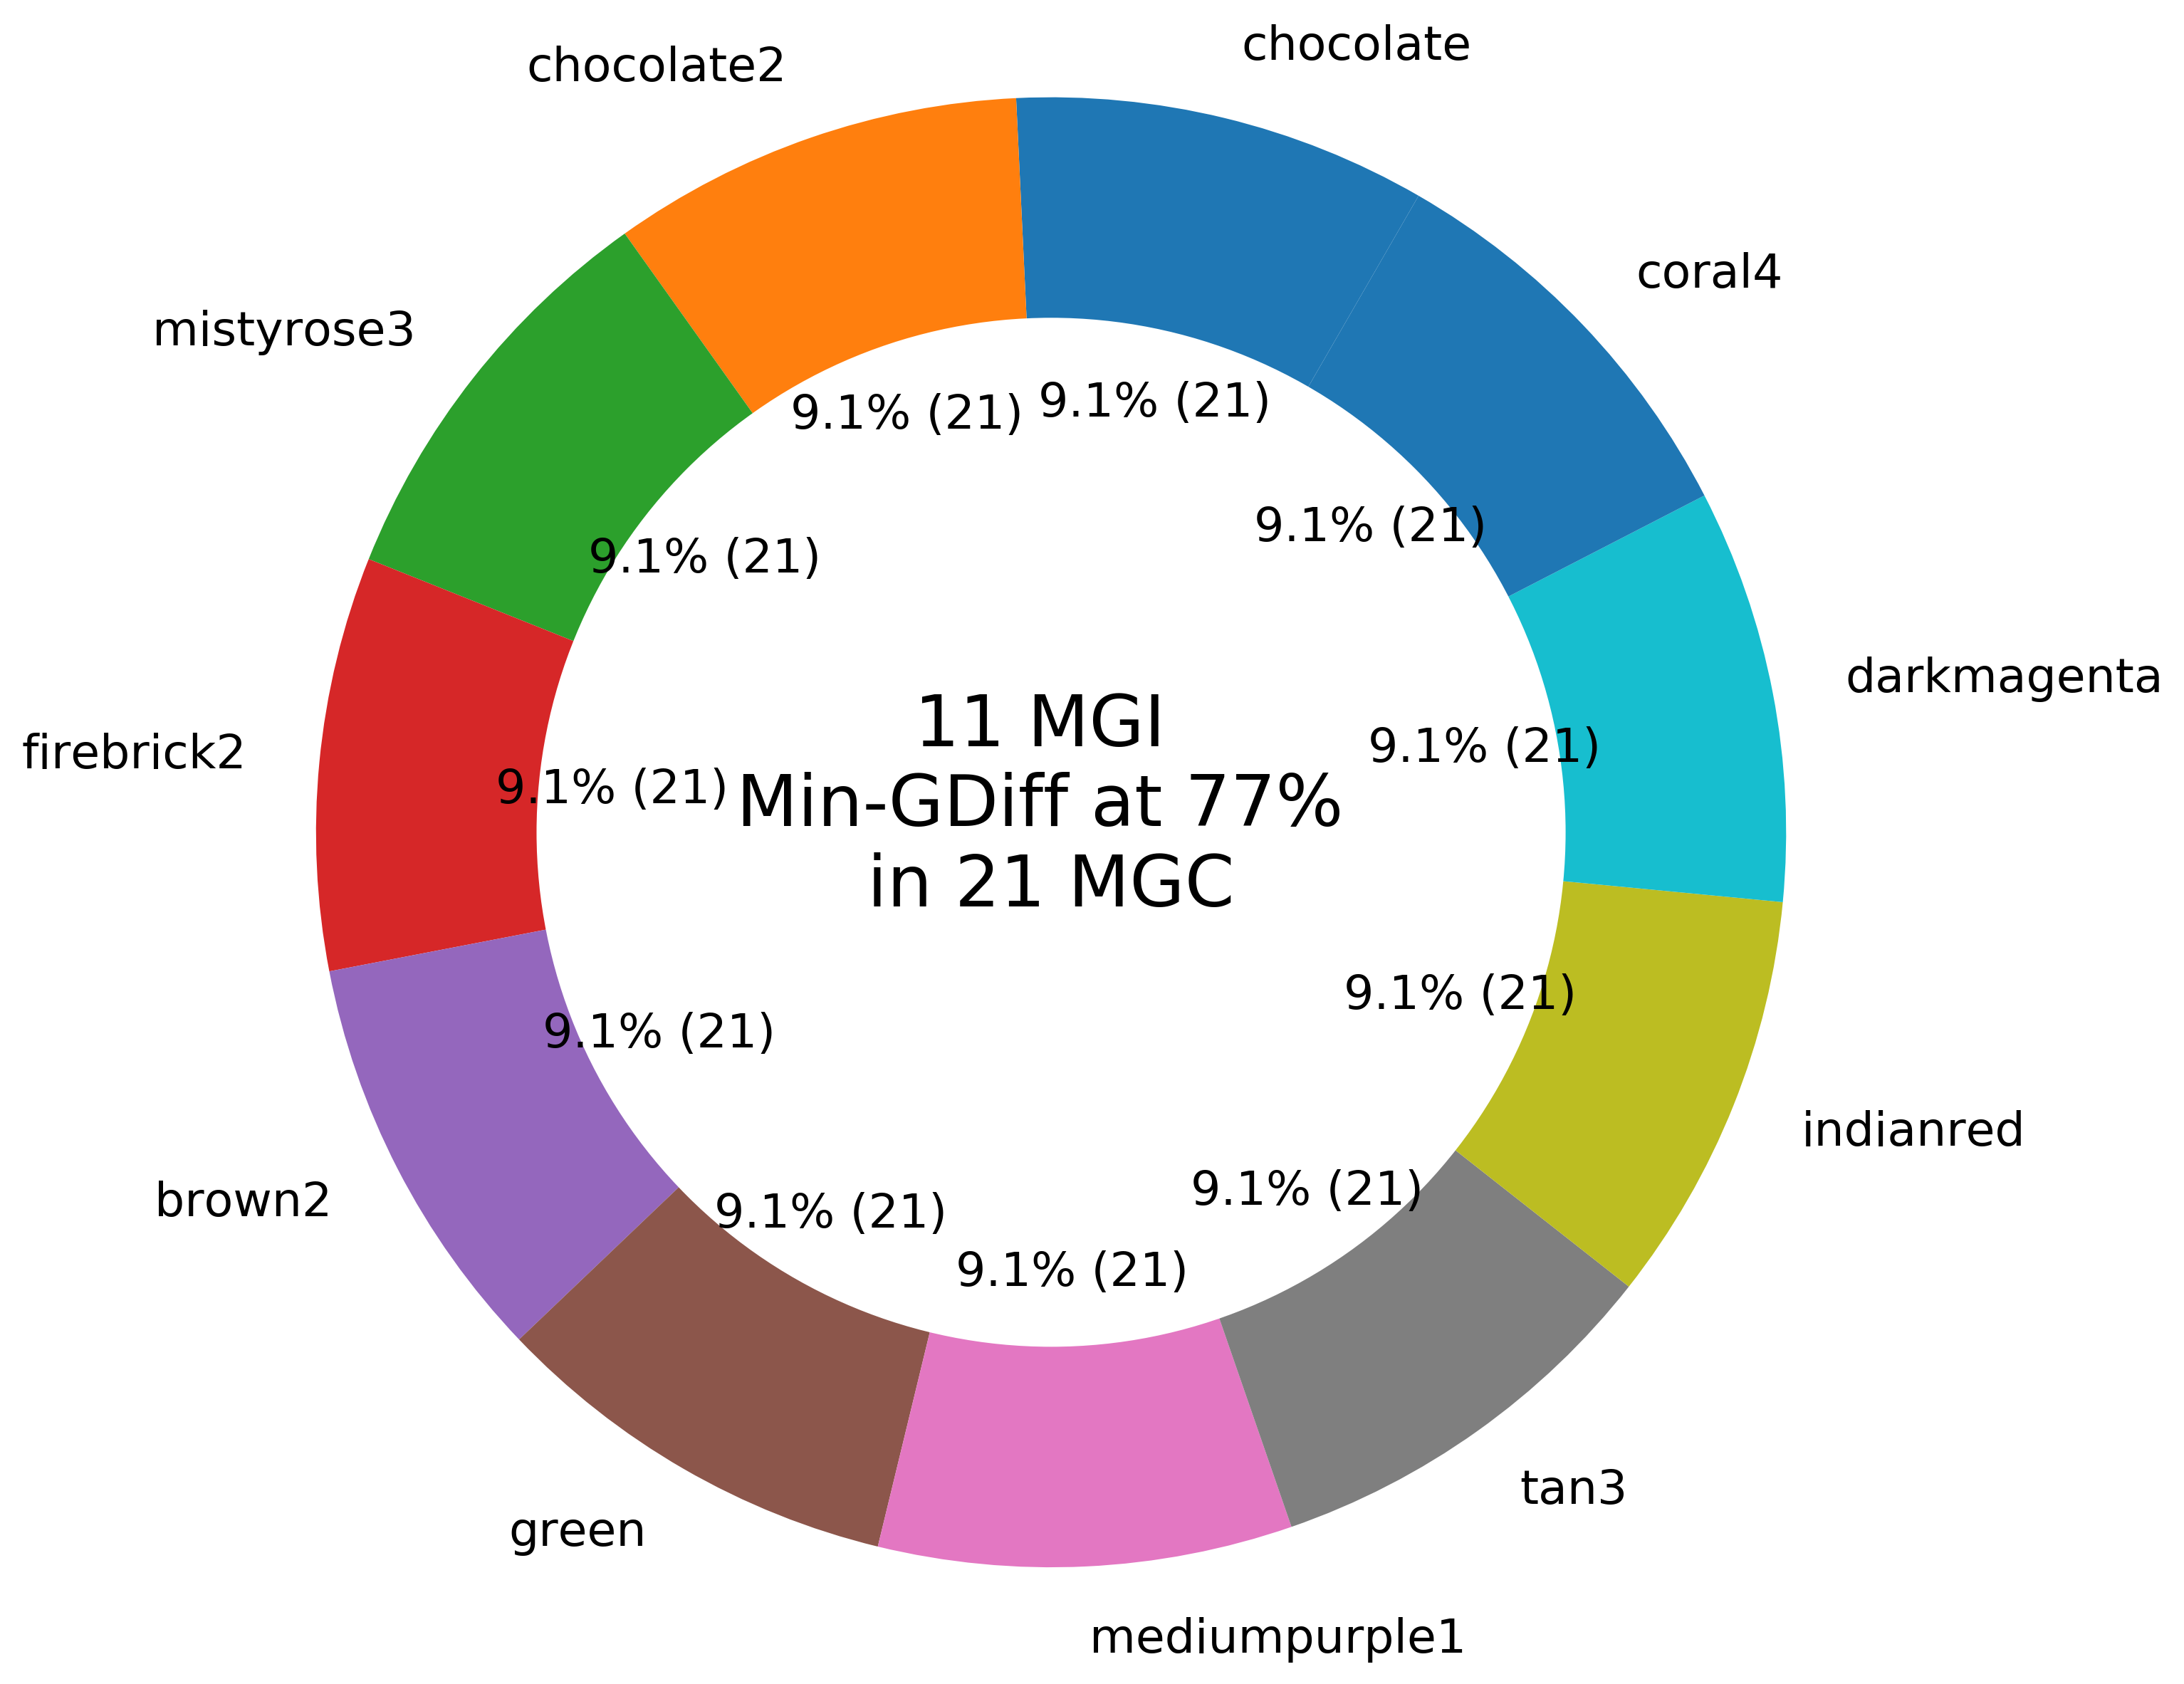

In [40]:
mods_count = len(df_preselected_counts3)
text = str(mods_count) +' MGI \nMin-GDiff at '+ str(perc_dif_set) +'% \nin ' + str(i_max_mods) + ' MGC'
make_pie_donut_chart2(quantity, labels, text)